<a href="https://colab.research.google.com/github/groovu/dh-eucr/blob/master/Truong_DH100_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring University of California Subreddits documentation
This notebook documents the work process for my DH100 project, https://github.com/groovu/dh-eucr

#Project Summary
This project explores the different University of California subreddits by extracting text, titles, and other metadata for exploratory data analysis.  Link to project poster: https://github.com/ FIXME

# Loading files
Here, I use the Pushshift API and some functions to aggregate the posts from each subreddit.  I used Alex P's guide here (https://www.textjuicer.com/2019/07/crawling-all-submissions-from-a-subreddit/) for the crawling methods.

In [ ]:
import requests
import json
import time
import pandas as pd
import nltk

url = "https://api.pushshift.io/reddit/search/submission"

def crawl_page(subreddit: str, last_page = None):
  """Crawl a page of results from a given subreddit.

  :param subreddit: The subreddit to crawl.
  :param last_page: The last downloaded page.

  :return: A page or results.
  """
  params = {"subreddit": subreddit, "size": 500, "sort": "desc", "sort_type": "created_utc"}
  if last_page is not None:
    if len(last_page) > 0:
      # resume from where we left at the last page
      params["before"] = last_page[-1]["created_utc"]
    else:
      # the last page was empty, we are past the last page
      return []
  results = requests.get(url, params)
  if not results.ok:
    # something wrong happened
    raise Exception("Server returned status code {}".format(results.status_code))
  data = json.loads(results.text)
  return data['data']

def crawl_subreddit(subreddit, max_submissions = 100):
  """
  Crawl submissions from a subreddit.

  :param subreddit: The subreddit to crawl.
  :param max_submissions: The maximum number of submissions to download.

  :return: A list of submissions.
  """
  submissions = []
  last_page = None
  while last_page != [] and len(submissions) < max_submissions:
    last_page = crawl_page(subreddit, last_page)
    submissions += last_page
    #time.sleep(3)
  return submissions[:max_submissions]

def getSubmissionCount(subreddit):
  url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=' + subreddit + '&metadata=true&size=0&after=0'
  subcount = requests.get(url)
  return json.loads(subcount.text)['metadata'].get("total_results")

Here I go through each subreddit to save it's post into a csv file.  This process takes approximately 30 minutes to an hour per subreddit.  I tried to setup a script to iterate through each subreddit, but Google Colab would shutdown in the middle of the process sometimes, losing hours of work without saving anything complete.

In [ ]:
i = 'berkeley' # Change the subreddit here to which ever subreddit you want to scrape.
count = getSubmissionCount(i)
count = 100 # sample, count above should return the number of posts for each subreddit.

lastest_submissions = crawl_subreddit(i)
from google.colab import files
import pandas as pd

#Converts from JSON to CSV
with open(i+ '.txt', 'w') as f:
  json.dump(lastest_submissions, f)
with open(i + '.txt') as f2:
  df = pd.read_json(f2)

df.to_csv(i+'.csv', encoding='utf-8-sig', index=False)
# files.download(i+'.csv')
# Uncomment to download csv to local.

I repeated this process for each UC subreddit and saved their .csv files for persistence.

#Using Pandas (Links to an external site.) for Parsing / Structuring your dataset

Here you can load each .csv from local or continue working with the csv from the previous code block.  I load my file into pandas to work with.

In [ ]:
import pandas as pd

data_cal = pd.read_csv("berkeley.csv")

Below is a sample of what the csv file looks like.  I am unsure why this happens, but I've noticed that some subreddits have more or less columns than others.  I assumed each would have the same types of metadata, but it's possible some subreddits are enabling more features than others, which provides more columns.


In [ ]:
data_cal.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,author_flair_template_id,edited,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,removed_by_category,media_metadata,poll_data,distinguished
0,[],False,fidsa,NaN,[],NaN,text,t2_s9qaodz,0.0,0.0,[],False,False,1593999327,self.berkeley,https://www.reddit.com/r/berkeley/comments/hly...,{},hlyj2q,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,3,0,False,all_ads,/r/berkeley/comments/hlyj2q/cs_major_schedule_...,False,6,1594011924,1,Taking CS 61A fall don't have too much coding ...,True,False,False,berkeley,t5_2qh9w,40449,public,self,CS Major Schedule for Fall,0,[],0.67,https://www.reddit.com/r/berkeley/comments/hly...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,tokotto,NaN,[],NaN,text,t2_1cxcbkhk,0.0,0.0,[],False,False,1593997646,self.berkeley,https://www.reddit.com/r/berkeley/comments/hly...,{},hly4jx,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,2,0,False,all_ads,/r/berkeley/comments/hly4jx/how_to_keep_track_...,False,6,1594011288,0,I’m taking cs61a and data8 this summer and was...,True,False,False,berkeley,t5_2qh9w,40449,public,self,how to keep track of grades in classes that ar...,0,[],0.50,https://www.reddit.com/r/berkeley/comments/hly...,all_ads,6,NaN,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,cali4mula,NaN,[],NaN,text,t2_1onsd8yo,0.0,0.0,[],False,False,1593996046,self.berkeley,https://www.reddit.com/r/berkeley/comments/hlx...,{},hlxqey,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,1,0,False,all_ads,/r/berkeley/comments/hlxqey/uc_berk_undergradu...,False,6,1594010669,2,"Incoming soph here - Last year, I received mon...",True,False,False,berkeley,t5_2qh9w,40448,public,self,UC Berk Undergraduate Scholarship,0,[],0.75,https://www.reddit.com/r/berkeley/comments/hlx...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,ExcellentWeather,NaN,[],NaN,text,t2_zxmjahk,0.0,0.0,[],False,False,1593991515,self.berkeley,https://www.reddit.com/r/berkeley/comments/hlw...,{},hlwkqm,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,6,0,False,all_ads,/r/berkeley/comments/hlwkqm/taking_chem_1a_and...,False,6,1594008565,2,I'm a rising sophomore and I was a little (see...,True,False,False,berkeley,t5_2qh9w,40446,public,self,Taking Chem 1A and Bio 1B next semester,0,[],1.00,https://www.reddit.com/r/berkeley/comments/hlw...,all_ads,6,NaN,dark,59c45072-2446-11e5-aad7-0e7f0fa558f9,1.593997e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Abject_Combination,NaN,[],NaN,text,t2_3yi6du9k,0.0,0.0,[],False,False,1593991317,self.berkeley,https://www.reddit.com/r/berkeley/comments/hlw...,{},hlwisw,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,4,0,False,all_ads,/r/berkeley/comments/hlwisw/can_bioe_10_substi...,False,6,1594008459,2,"I'm taking bioE 10 anyway for my major, so I w...",True,False,False,berkeley,t5_2qh9w,40446,public,self,Can bioE 10 substitute for the premed bio requ...,0,[],1.00,https://www.reddit.com/r/berkeley/comments/hlw...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Getting your data into a Pandas DataFrame

In [ ]:
df = pd.DataFrame(data = data_cal)

'CS Major Schedule for Fall'

#Use the Natural Language ToolKit (NLTK)


In [ ]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt


tokens = df['title'].apply(nltk.word_tokenize)


#Choose at least one of the following tools for analysis: Topic Modeling

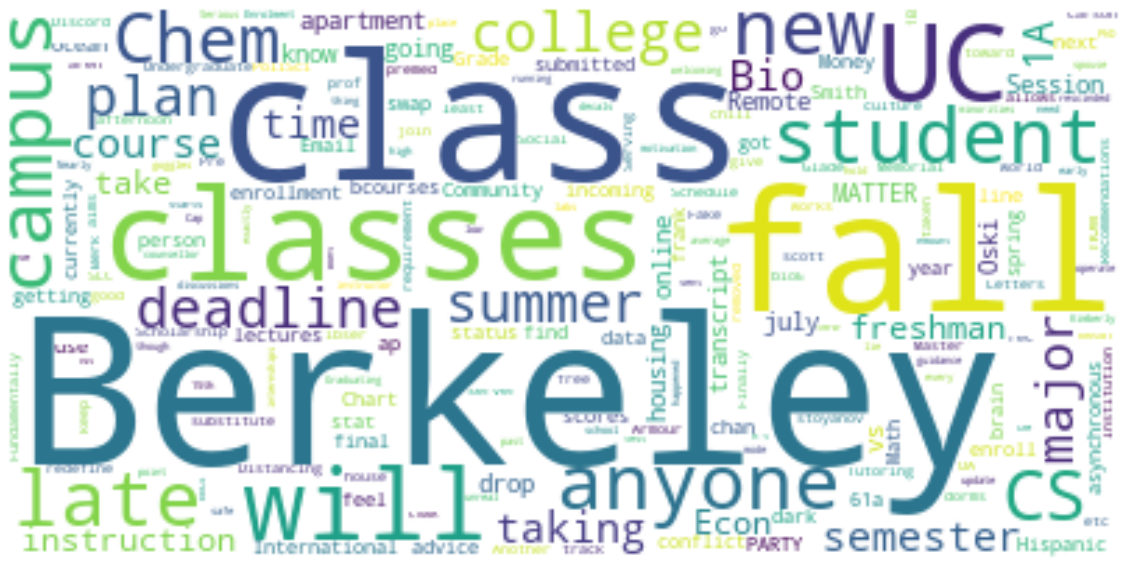

CS Major Schedule for Fall how to keep track of grades in classes that aren ’ t on bcourses ? UC Berk Undergraduate Scholarship Taking Chem 1A and Bio 1B next semester Can bioE 10 substitute for the premed bio requirement ? SLC Tutoring for fall ? If a course allows time conflict enrollment , does that mean it will have asynchronous instruction ? Another afternoon at Memorial Glade , Pre-Social Distancing Has anyone taken ( or currently taking ) prof. scott carson 's econ class before ? Finally some good news in the world . Fake news being removed Recommendations for when to take PoliSci 3 ? Letters of rec for 2021 CS Master 's ? Discord server for college students to chill give advice etc feel free to join UA Chart ibser or stoyanov for stat 20 ? Under Armour Chart As an incoming freshman , should I go dorms or apartment/house this year ? ‘ Fundamentally redefine campus culture ’ : UC Berkeley works toward Hispanic-Serving Institution status , aims for at least 25 % Hispanic enrollmen

In [ ]:
qtext = ''

for i in tokens:
  for j in i:
    qtext += j + ' '

wordcloud = WordCloud(background_color="white").generate(qtext)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#Describe what the tool(s) and method(s) are doing (ELI5)
In my example, I used NLTK and matplotlib to generate a Topic Model that shows what the popular topics are in the Berkeley subreddit.

The WordCloud module works by taking in a string and counting the unique occurence of each string.  The more counts, the bigger the text appears in the word map.

# Export results as .csv

In [ ]:
files.download("berkeley.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>